In [1]:
from utils import *
from train import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_image(img, ax=None):
    if ax is None:
        ax = plt
    if len(img.shape) == 2:
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)
def show_images(img_titles):
    """show a list of (img, title), or a list of images"""
    cols = len(img_titles)
    f, axs = plt.subplots(1, cols, figsize=(24, 9))
    f.tight_layout()
    for i, image_title in enumerate(img_titles):
        if type(image_title) is tuple or type(image_title) is list:
            img, title = image_title
        else:
            img = image_title
            title = "unspecified"
        axs[i].set_title(title, fontsize=30)
        show_image(img, axs[i])
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Explore HOG

In [3]:
def view_hog(file, color_space, orient=9, pix_per_cell=8, cell_per_block=2):
    test_image = read_image(file)
    conv = convert_color(test_image, color_space)
    def get_vis (channel):
        _, img = get_hog_features(conv[:,:,channel], orient, pix_per_cell, cell_per_block, vis=True)
        return img
    
    img1, img2, img3 = [get_vis(i) for i in [0,1,2]]
    show_images([(test_image, 'original'),
                 (conv,       color_space),
                 (conv[:,:,0], 'channel 1'),
                 (img1,       'ch1 HOG'),
                 (conv[:,:,1], 'channel 2'),
                 (img2,       'ch2 HOG'),
                 (conv[:,:,2], 'channel 3'),
                 (img3,       'ch3 HOG')])
def explore_file(view_file):
    spaces = ['RGB', 'HSV', 'YCrCb', 'HLS', 'YUV', 'LUV']
    for s in spaces:
        view_hog(view_file, s, orient=32)

/Users/ljs/miniconda2/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:88: RuntimeWarning: invalid value encountered in sqrt
  image = np.sqrt(image)


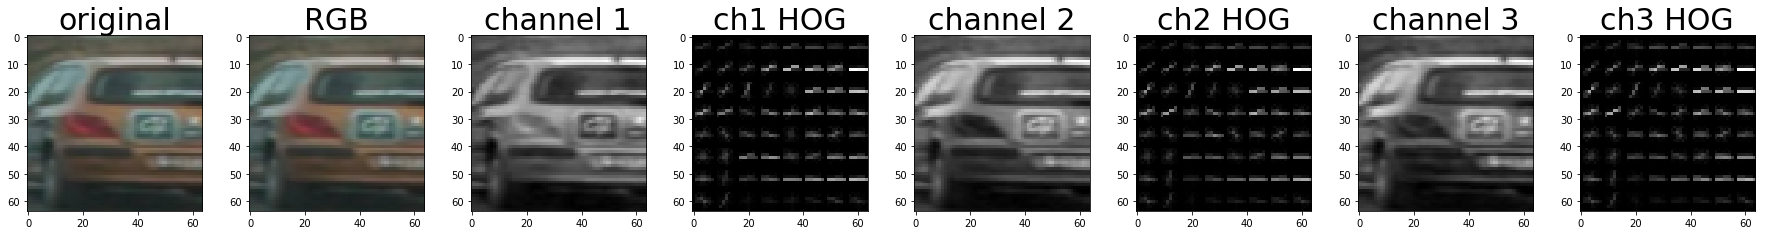

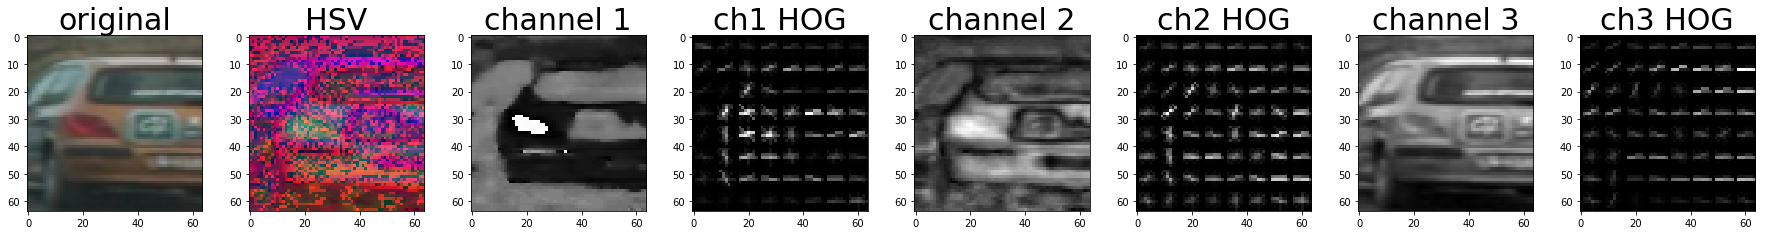

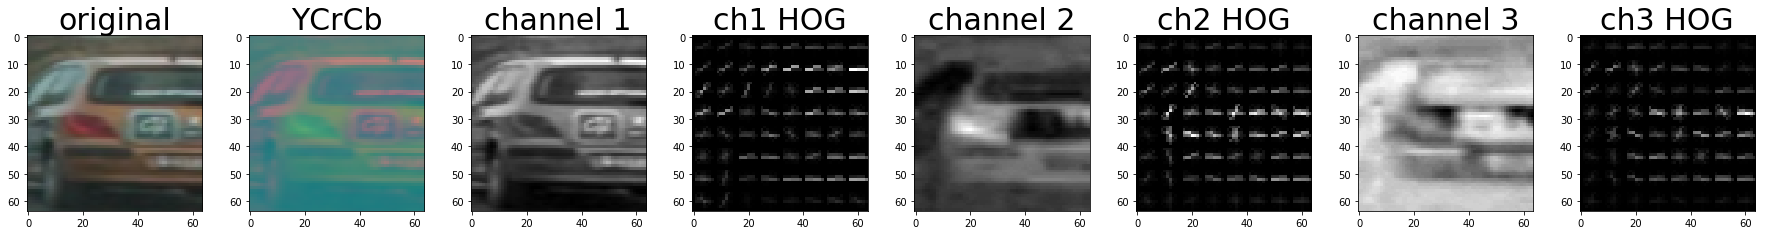

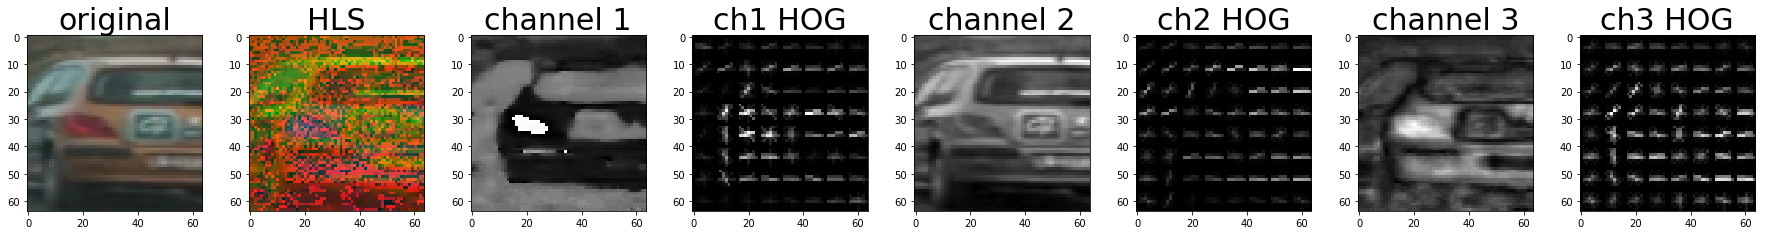

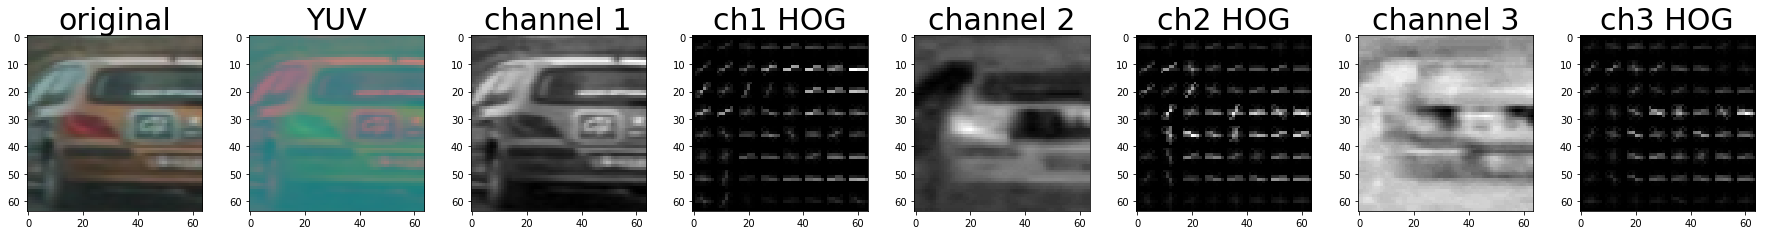

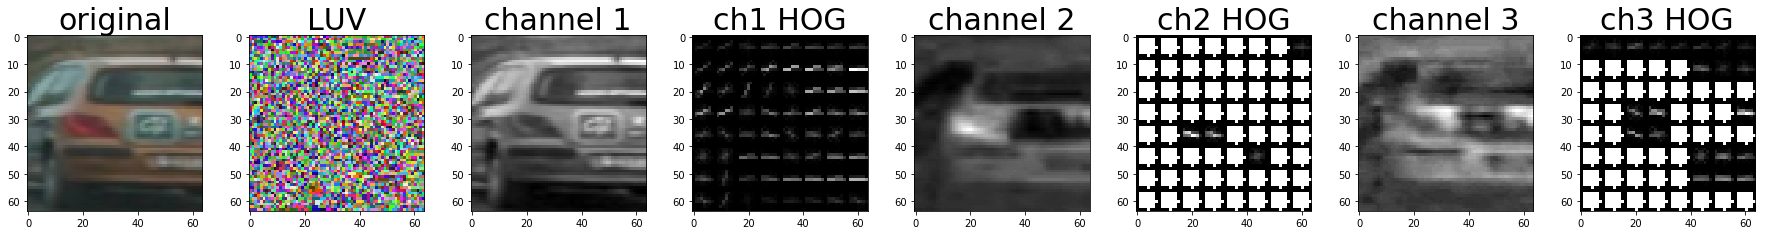

In [8]:
explore_file('large-data/vehicles/GTI_Right/image0775.png')

/Users/ljs/miniconda2/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:88: RuntimeWarning: invalid value encountered in sqrt
  image = np.sqrt(image)


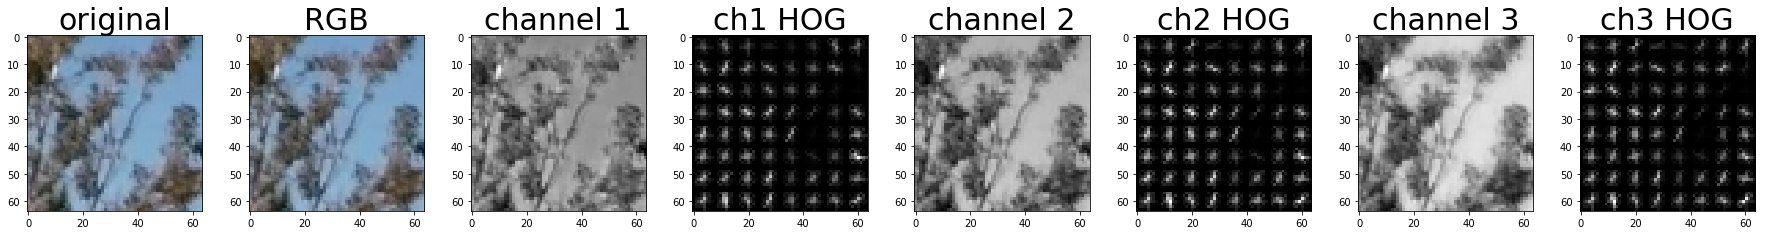

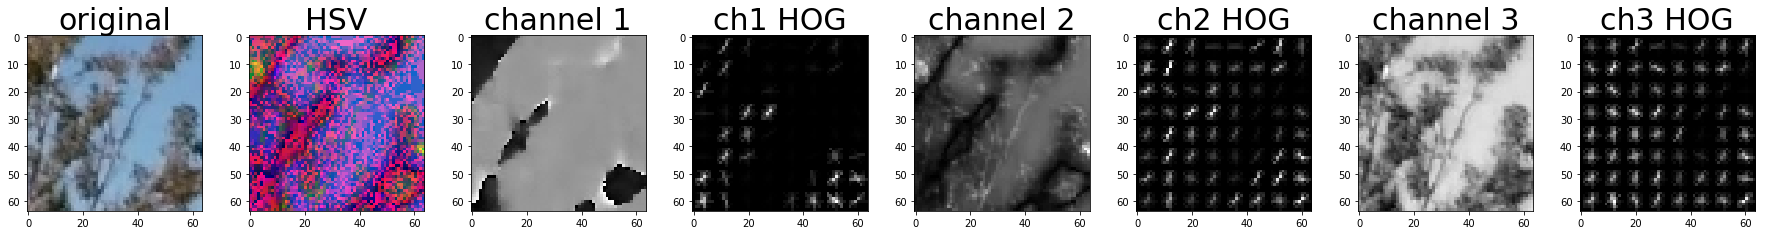

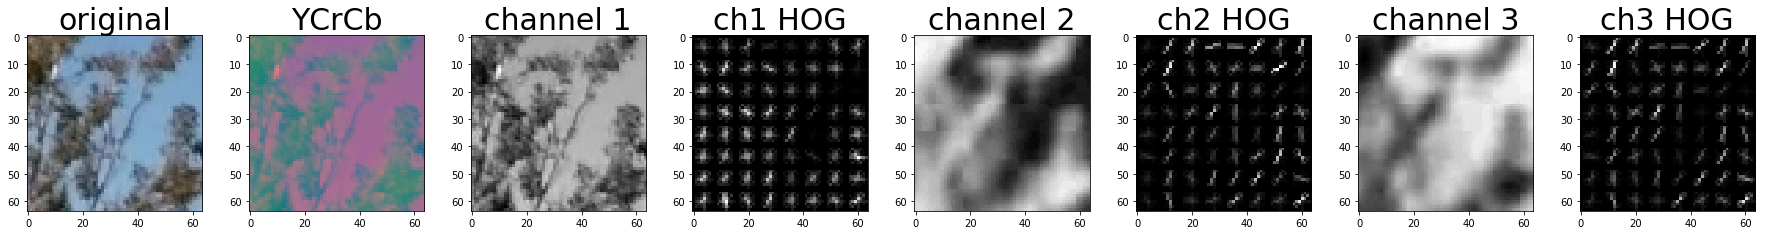

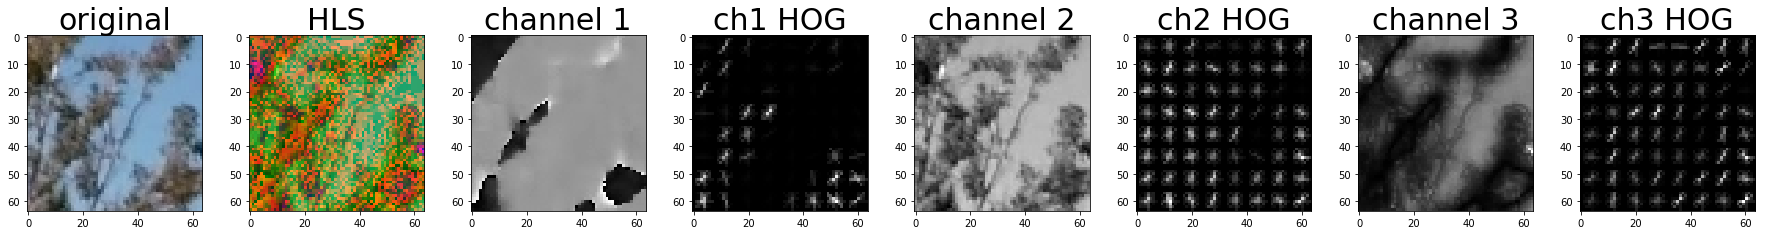

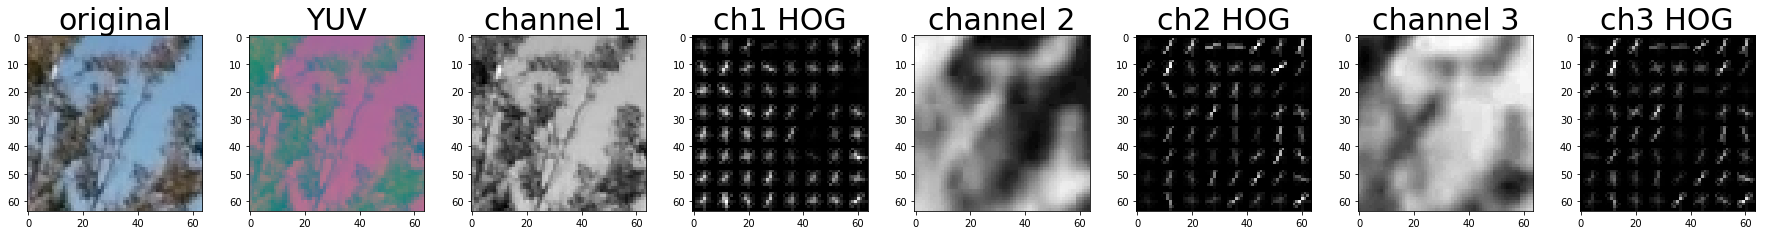

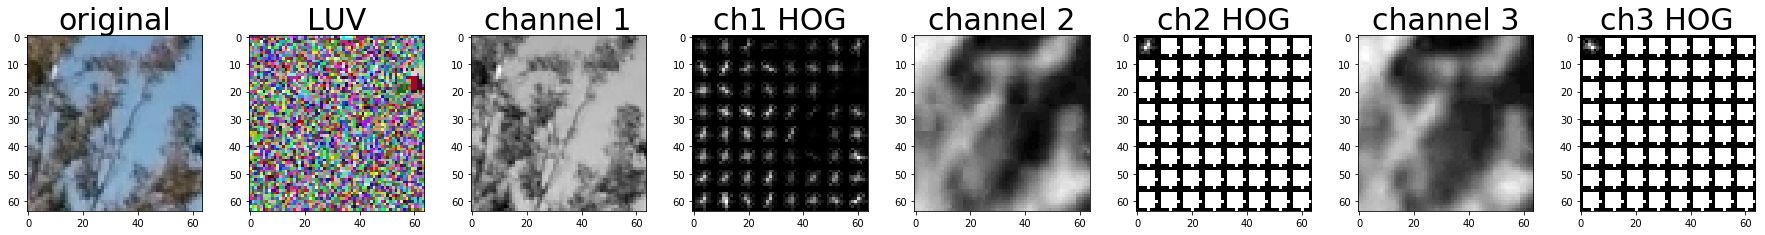

In [9]:
explore_file('large-data/non-vehicles/Extras/extra20.png')

# Training

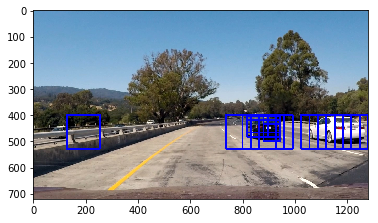

In [6]:
#model = training('large-data/vehicles', 'large-data/non-vehicles')

model = Model('model.pkl')
test_image = read_image('test_images/test1.jpg')

search = CarSearch(model)
annotated = search.annotate_cars_in_image(test_image)
show_image(annotated)


# Video

In [ ]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

count = [0]
def save_image(img):
    mpimg.imsave('output-images/image-%d.png'%count[0], img)
    count[0] += 1
    return img

def process_video(video_filename):
    model = Model('model.pkl')
    search = CarSearch(model) 
    output = "annotated_P5_" + video_filename
    input_clip = VideoFileClip(video_filename)#.subclip(21,23)
    clip = input_clip.fl_image(search.annotate_cars_in_video)
    #clip = input_clip.fl_image(save_image)
    %time clip.write_videofile(output, audio=False)

v1 = 'test_video.mp4'
v2 = 'project_video.mp4'

process_video(v2)